# An Investigation of Danish Fertility

In the recent years, danish policymakers have expressed concern for the state of the national fertility rates. According to the danish newspaper Berlingske, a danish woman would in 2022 on average give birth to 1,55 children (see [this website](https://www.berlingske.dk/samfund/foedselsraten-falder-i-naesten-alle-landsdele-koebenhavn-er-blandt-de)). 
To sustain the population size without taking immigration into consideration, a woman would need to give birth to 2,1 children. It is of great economical interest why the fertility rates are declining, and policy makers are already introducing measures to deal with the decline. In her new years speech, the prime mininister adressed to the nation that extra rounds of fertility treatment would become accessible for free for danish women in the forthcoming year. In this project, we investigate the decline in fertility and potential factors influencing it.


In [14]:
# Import of relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import mpl_axes_aligner

# Autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# User written modules
import dataproject

# API's
from IPython.display import display
import requests
from dstapi import DstApi

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Development in GDP and fertility rate

We use data from Statistics Denmark, specifically the two datasets NAN1 and HISB3. We import the relevant variables from these datasets using an API.

From NAN1 we import data on yearly growth in GDP from 1966 to 2023. 

In [15]:
from dataproject import*
BNP = data_NAN1()

# How is data structured?
BNP.head()

,TRANSAKT,PRISENHED,TID,INDHOLD
0,B.1*g Gross domestic product,Period-to-period real growth (per cent),1979,3.9
1,B.1*g Gross domestic product,Period-to-period real growth (per cent),2022,2.7
2,B.1*g Gross domestic product,Period-to-period real growth (per cent),2005,2.3
3,B.1*g Gross domestic product,Period-to-period real growth (per cent),1985,4.0
4,B.1*g Gross domestic product,Period-to-period real growth (per cent),1991,1.4


In [16]:
# Cleaning data 
BNP = clean_NAN1()

# Checking cleaning went well 
BNP.head()

,year,growth
41,1967,5.5
51,1968,5.6
29,1969,6.5
12,1970,1.6
49,1971,3.0


From HISB3 we import data on number of women and number of livebirths from 1901 to 2023.

In [17]:
# Load the data.
HIS = data_HISB3()

# How is data structured?
HIS.head()

,BEVÆGELSE,TID,INDHOLD
0,"Women January 1. (in 1,000)",1996,2659
1,Total number of livebirths,1996,67638
2,"Women January 1. (in 1,000)",1989,2602
3,Total number of livebirths,1989,61351
4,"Women January 1. (in 1,000)",1992,2618


In [18]:
# Cleaning data 
fertility = clean_HISB3()

# Chekcing everything went well
fertility.head()

,year,births,women
0,1901,73219.0,1255.0
1,1902,72839.0,1271.0
2,1903,72351.0,1286.0
3,1904,73692.0,1300.0
4,1905,73082.0,1316.0


We calculate the crude birth rate and the year-in-yean percentage change. 

In [19]:
# Calculate fertility as births per 1000 women in a new column
fertility['fertility'] = fertility['births']/fertility['women']

# Calculate yearly change in fertility in a new column
fertility['rate'] = fertility['fertility'].pct_change()

# Remove NaN
fertility = fertility.dropna() 
fertility.head()

,year,births,women,fertility,rate
1,1902,72839.0,1271.0,57.308419,-0.017713
2,1903,72351.0,1286.0,56.260498,-0.018286
3,1904,73692.0,1300.0,56.686154,0.007566
4,1905,73082.0,1316.0,55.533435,-0.020335
5,1906,74217.0,1331.0,55.760331,0.004086


# Crude fertility rate, 1900-2023

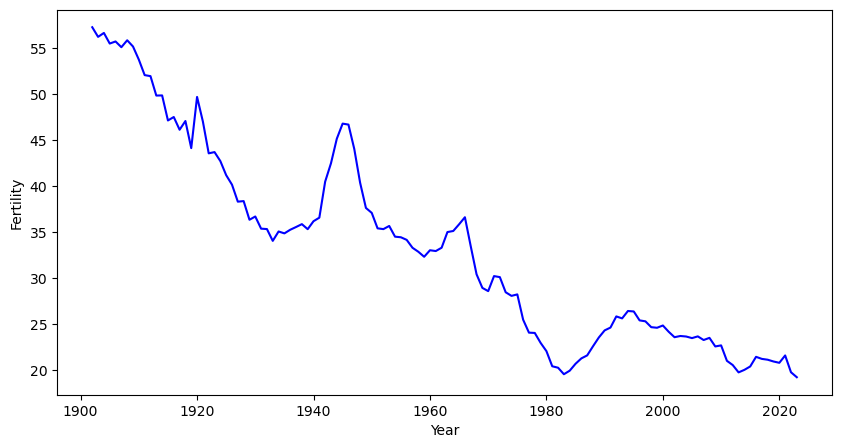

In [20]:
# Plot data
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(fertility['year'], fertility['fertility'], color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fertility') 

plt.show()

The graph above depicts the crude birth rate, i.e., the number of children born per thousand women, in Denmark in the period 1900-2023. In general there has been a large decline in fertility in the period. However, it has not been a constant decrease. We note that there was a large increase in fertility after the Second World War (often referred to as the "baby boom"). We also note that although fertility is very low today, it is not the first time. In the beginning of the 1980's fertility was also at a very low rate, whereafter it increased again. 

We combine the constructed datasets of GDP and fertility.

In [21]:
# Merge on year
GDP_fertility = pd.merge(fertility,BNP, how = 'inner', on = ['year'])

# Set index to year instead of 0, 1 ...
GDP_fertility= GDP_fertility.set_index('year')
GDP_fertility.tail()


,births,women,fertility,rate,growth
year,,,,,
2019,61167.0,2917.0,20.969146,-0.009119,1.5
2020,60937.0,2926.0,20.826042,-0.006825,-2.4
2021,63473.0,2935.0,21.626235,0.038423,6.8
2022,58430.0,2951.0,19.800068,-0.084442,2.7
2023,57469.0,2984.0,19.259048,-0.027324,1.9


# Illustrate relationship between GDP and fertility rate

Periods of economic prosperity are characterised by rising GDP, and recessions of the opposite. It's reasonable to assume a positive correlation between GDP and the number of births, as economic growth often enhances economic security. This increased security can create greater confidence in the future, thereby encouraging individuals to start families.

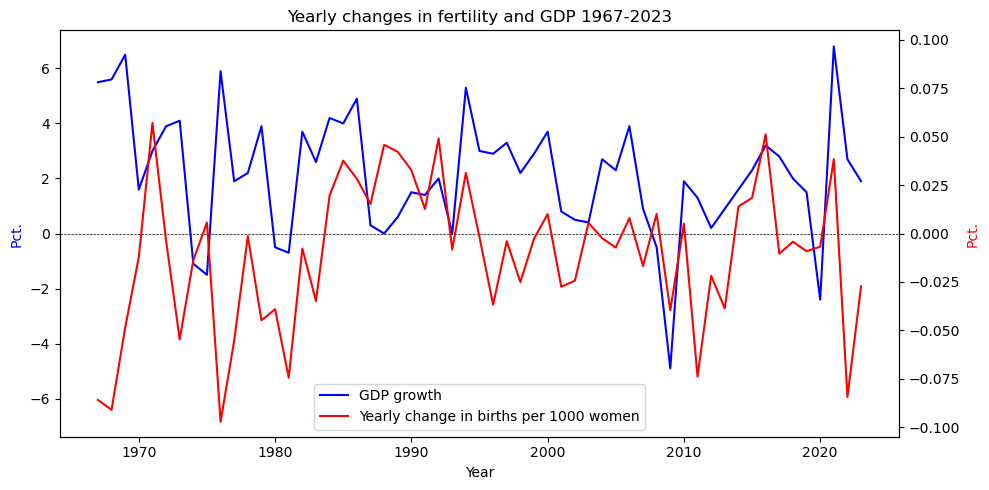

In [22]:
# Create plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot GDP growth on the primary y-axis
ax1.plot(GDP_fertility.index, GDP_fertility['growth'], color='b', label='GDP growth')
ax1.set_xlabel('Year')
ax1.set_ylabel('Pct.', color='b')

# Create a secondary y-axis and plot fertility
ax2 = ax1.twinx()  
ax2.plot(GDP_fertility.index, GDP_fertility['rate'], color='r', label='Yearly change in births per 1000 women')
ax2.set_ylabel('Pct.', color='r')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc = 'lower center')

# Add title
plt.title('Yearly changes in fertility and GDP 1967-2023')

# Align y-axes
mpl_axes_aligner.align.yaxes(ax1, 0, ax2, 0, 0.5)

# Add line through 0
ax1.axhline(0, linewidth=0.5, color='black', linestyle='--')
fig.tight_layout()

# Show plot
plt.show()

We anticipate a delayed response in fertility due to the duration of a pregnancy. This can be seen from the above  graph, notably in the 1970s, 1980s, and following the financial crisis in 2008, where the decline in birth rates follows after the drop in GDP growth.

However, the pattern in the graph appears somewhat arbitrary, and it is therefore not possible to conclude anything decisive about the relationship between GDP and fertility based on this graphical investigation.

# Development in women's education level

We use data on women's educational attainment from the dataset HFUDD11 from Statistics Denmark. The data is only available from 2008 to 2022. 

In [23]:
# Load data on educational attainment using an API
hfudd11 = data_HFUDD11()
hfudd11.head()

,BOPOMR,HERKOMST,HFUDD,ALDER,KØN,TID,INDHOLD
0,All Denmark,Total,H10 Primary education,20-24 years,Women,2008,40780
1,All Denmark,Total,H10 Primary education,25-29 years,Women,2008,26981
2,All Denmark,Total,H10 Primary education,30-34 years,Women,2008,27719
3,All Denmark,Total,H10 Primary education,35-39 years,Women,2008,31359
4,All Denmark,Total,H10 Primary education,40-44 years,Women,2008,37998


In [24]:
# Cleaning data 
hfudd11= clean_HFUDD11()

# Checking everything went well 
hfudd11.head()


,HFUDD,Age,Year,Number of women
0,H10 Primary education,20-24 years,2008,40780
1,H10 Primary education,25-29 years,2008,26981
2,H10 Primary education,30-34 years,2008,27719
3,H10 Primary education,35-39 years,2008,31359
4,H10 Primary education,40-44 years,2008,37998


In [25]:
# Summarize number of women in each age group for each year and level of education. 
hfudd11_sum = hfudd11.groupby(['HFUDD', 'Year'])['Number of women'].sum().reset_index()

# Checking it goes well 
hfudd11_sum.head()

,HFUDD,Year,Number of women
0,H10 Primary education,2008,164837
1,H10 Primary education,2009,160586
2,H10 Primary education,2010,157632
3,H10 Primary education,2011,153895
4,H10 Primary education,2012,149454


We illustrate the development in women's educational attainment with a interactive plot showing the developemnt for each level of education individually. 

In [26]:
hfudd11_sum = pd.DataFrame(hfudd11_sum)

# Construction of the plot
def plot_e(hfudd11_sum, HFUDD): 
    filtered_df = hfudd11_sum[hfudd11_sum['HFUDD'] == HFUDD]
    ax = filtered_df.plot(x='Year', y='Number of women', style='-o', legend=False)
    ax.set_title(f'Number of Women at {HFUDD} Education Level')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Women')
    plt.show()

# Dropdown menu for education level
education_levels = hfudd11_sum['HFUDD'].unique()
widgets.interact(plot_e, 
                 hfudd11_sum=widgets.fixed(hfudd11_sum),
                 HFUDD=widgets.Dropdown(description='HFUDD', 
                                        options=education_levels, 
                                        value=education_levels[0]));

interactive(children=(Dropdown(description='HFUDD', options=('H10 Primary education', 'H20 Upper secondary edu…

The plot depicts the educational attainment among Danish women from 2008 to 2023. While the number of women with primary education or vocational training as the highest level of education has fallen, the number of women with longer educations, e.g., masters or Ph.d.'s has increased. In general the plot shows that the educational attainment among Danish women has increased significantly. 

It is not possible to conclude whether the educational attainment among women has been a deciding factor in the lower fertiliy, however we do find that the fertility has fallen while the educational attainment has rissen, leading us to suspect a potential relationship between the two. Further investigations would however be needed to establish a causal relationship between fertility and women's educational attainment. 

# Concluding remark

In this project we have investigated the development in the number of births per woman in Denmark and potential explanations for the development. 

Overall we find that the fertility, as measured by the number of births per thousand women, has fallen drastically since the 1970's. 

We investigate two potential factors influencing fertility: 
1) GDP growth 
2) The educational attainment among women. 

It is not possible to establish a causal relationship between fertility and each of the two factors with the data used in this project. However, the litterature suggests that both factors influence the fertility rate, and we do not find any evidence contradicting this. The correlations in data support the hypothesis that the fertility rate reacts positively to financial stability/growth. Likewise, the drop in fertility has coincided with women's higher educational attainment. 